---

#University of Stirling - Spring 2023

## ITNPAI1 - Deep Learning for Vision and NLP (2022/3)

---

# Assignment Summary

In this activity, you are required to apply the knowledge acquired in this module through the design and development of a complete project for deep learning-based image pattern recognition in an application to be defined by yourself. For this, you will need to perform the following **mandatory** steps:

1. [Problem definition](#scrollTo=hglJVRRslqMn)
2. [GitHub repository](#scrollTo=ecxDhkV9qmUf)
3. [Dataset](#scrollTo=qEgFzxmWrGA9)
4. [Dataloader](#scrollTo=EDd6lLwlx4un)
5. [Proposed solution](#scrollTo=ScTrpUW8zOp4)
6. [Experimental tests and evaluations](#scrollTo=3RBW58of0ZDo)
7. [Quiz and Report](#scrollTo=ws14iV4Dp_vf)
8. [Demonstration session](#scrollTo=ShLJrPKT4SQp)


---

# 1. **Problem definition** 


You must choose a computer vision task (classification, detection, semantic segmentation, captioning, geotagging, etc) to be modeled from images collected in the context of two different cities (A and B).
 - If the work is being carried out in pairs, **cities A and B must be the hometowns of each student**. In the case of individual work, city A must be your hometown and city B must be Stirling (or Edinburgh, if needed).
 - The standard project recommendation is to focus on recognizing cars or trees, which are easier to identify and annotate. Other objects or phenomena can be adopted, but are subject to prior approval by the module instructor (Jefersson A. dos Santos). **It is not allowed to assemble datasets containing people. Other sensitive patterns, such as license plates, must be properly hidden.**
 - Don't panic! We are aware that acquiring images _in situ_ is an impediment for most students. The dataset can be assembled with images collected remotely or from public repositories. Just be careful with rights and permissions for using images found on the internet. Anyway, these factors must be taken into account for the problem definition.
 - Think of interesting problems, but that are easy to assemble an image dataset. Although we encourage you to do interesting and engaging work, it shouldn't be too complex or time-consuming. Try to appropriately scale the time required for this step. Ask the instructors for advice, if necessary.

[top](#scrollTo=4i5afvUbhmGo)
 

**Problem Statement:** The aim of this project is to develop an object detection model using the pre-trained YOLO v4 model available on Roboflow that can accurately detect and recognize cars in images. The model should be able to identify various types of cars in different environments, such as urban and suburban areas. To accomplish this, we will collect a dataset of images of cars while hiding their license plates and potentially blurring any identifying information of individuals. Using this dataset, we will fine-tune the pre-trained YOLO v4 model on the collected images. The model's performance will be evaluated on a validation set, and the final model will be tested on a separate test set to assess its ability to generalize to new images. The successful completion of this project will contribute towards the development of computer vision technologies that can assist in traffic analysis and surveillance.

---
# 2. **GitHub repository**

Give your project a name, create a private [GitHub repository](https://github.com/) with the name [Module Code] + [Project Name] and give access to the module instructors. Create a cover page with a description of your project. This empty notebook must be uploaded in the repository as well as the created dataset. The checkpoint date to perform this task will be two weeks after the publication of this notebook. 
This notebook should be updated and committed to the repository according to the checkpoint dates.
The repository's update history will be used as a criterion for monitoring and evaluating the work.
**Check the videos provided in the extra section on Canvas for more details on how to create your GitHub repository.**

[top](#scrollTo=4i5afvUbhmGo)

Link of the Repositsary : https://github.com/objectdetection2321/Cars_Detection

---
# 3. **Dataset creation**

You must collect a minimum of **200 positive samples** from the study objects for each city (A and B). 
Note that, depending on the task being solved, it will also be necessary to: 

   (i) collect more samples - negative ones, for instance;

   (ii) annotating each image, delineating objects or creating bounding boxes. Planning and executing this correctly is important to ensure effective training of deep learning-based models.

Your dataset can be assembled from one or more of the following ways:

  - *M1* - Pictures taken by yourself on site (street view from cities A and B), with attention to anonymization issues (if it is the case). It is not allowed to assemble datasets containing people. Other sensitive patterns, such as license plates, must be properly hidden.

  - *M2* - Aerial satellite/drone images obtained from GIS and remote sensing platforms or public repositories. Be careful with unusual file formats that may be challenging to manipulate using basic image processing libraries. We recommend keeping or converting the images to jpg or png.

  - *M3* - Pictures taken from other public available datasets. Remember you are not allowed to use datasets containing people or other sensitive patterns/objects.

  - *M4* - Images crawled from the internet as a whole (social networks, webpages, etc), with special attention to use and copyrights.

  - *M5* - Textual and metadata you may need in your project, with special attention to use and copyrights (as always!).

**Important:** If you collect the images on your own or from aerial imagery repositories, it will be necessary to keep the geographic coordinates. If you collect from specific websites, please retain the source links. This information should be placed in a .csv file and made available along with the final dataset.

[top](#scrollTo=4i5afvUbhmGo)

In [ ]:
# CUDA: Let's check that Nvidia CUDA drivers are already pre-installed and which version is it.
!/usr/local/cuda/bin/nvcc --version
# We need to install the correct cuDNN according to this output

In [ ]:
!nvidia-smi

In [ ]:
# This cell ensures you have the correct architecture for your respective GPU
# If you command is not found, look through these GPUs, find the respective
# GPU and add them to the archTypes dictionary

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# Tesla K80 
# ARCH= -gencode arch=compute_37,code=sm_37

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetson XAVIER
# ARCH= -gencode arch=compute_72,code=[sm_72,compute_72]

# GTX 1080, GTX 1070, GTX 1060, GTX 1050, GTX 1030, Titan Xp, Tesla P40, Tesla P4
# ARCH= -gencode arch=compute_61,code=sm_61

# GP100/Tesla P100 - DGX-1
# ARCH= -gencode arch=compute_60,code=sm_60

# For Jetson TX1, Tegra X1, DRIVE CX, DRIVE PX - uncomment:
# ARCH= -gencode arch=compute_53,code=[sm_53,compute_53]

# For Jetson Tx2 or Drive-PX2 uncomment:
# ARCH= -gencode arch=compute_62,code=[sm_62,compute_62]
import os
os.environ['GPU_TYPE'] = str(os.popen('nvidia-smi --query-gpu=name --format=csv,noheader').read())

def getGPUArch(argument):
  try:
    argument = argument.strip()
    # All Colab GPUs
    archTypes = {
        "Tesla V100-SXM2-16GB": "-gencode arch=compute_70,code=[sm_70,compute_70]",
        "Tesla K80": "-gencode arch=compute_37,code=sm_37",
        "Tesla T4": "-gencode arch=compute_75,code=[sm_75,compute_75]",
        "Tesla P40": "-gencode arch=compute_61,code=sm_61",
        "Tesla P4": "-gencode arch=compute_61,code=sm_61",
        "Tesla P100-PCIE-16GB": "-gencode arch=compute_60,code=sm_60"

      }
    return archTypes[argument]
  except KeyError:
    return "GPU must be added to GPU Commands"
os.environ['ARCH_VALUE'] = getGPUArch(os.environ['GPU_TYPE'])

print("GPU Type: " + os.environ['GPU_TYPE'])
print("ARCH Value: " + os.environ['ARCH_VALUE'])

** Installing Darknet for YOLOv4 on Colab**

In [ ]:
%cd /content/
%rm -rf darknet

In [ ]:
#we clone the fork of darknet maintained by roboflow
#small changes have been made to configure darknet for training
!git clone https://github.com/roboflow-ai/darknet.git

In [ ]:
#colab occasionally shifts dependencies around, at the time of authorship, this Makefile works for building Darknet on Colab

%%writefile Makefile
GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=1
ZED_CAMERA=0
ZED_CAMERA_v2_8=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)
# set ZED_CAMERA=1 to enable ZED SDK 3.0 and above
# set ZED_CAMERA_v2_8=1 to enable ZED SDK 2.X

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61] \
      -gencode arch=compute_37,code=sm_37

ARCH= -gencode arch=compute_60,code=sm_60

OS := $(shell uname)

VPATH=./src/
EXEC=darknet
OBJDIR=./obj/

ifeq ($(LIBSO), 1)
LIBNAMESO=libdarknet.so
APPNAMESO=uselib
endif

ifeq ($(USE_CPP), 1)
CC=g++
else
CC=gcc
endif

CPP=g++ -std=c++11
NVCC=nvcc
OPTS=-Ofast
LDFLAGS= -lm -pthread
COMMON= -Iinclude/ -I3rdparty/stb/include
CFLAGS=-Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC

ifeq ($(DEBUG), 1)
#OPTS= -O0 -g
#OPTS= -Og -g
COMMON+= -DDEBUG
CFLAGS+= -DDEBUG
else
ifeq ($(AVX), 1)
CFLAGS+= -ffp-contract=fast -mavx -mavx2 -msse3 -msse4.1 -msse4.2 -msse4a
endif
endif

CFLAGS+=$(OPTS)

ifneq (,$(findstring MSYS_NT,$(OS)))
LDFLAGS+=-lws2_32
endif

ifeq ($(OPENCV), 1)
COMMON+= -DOPENCV
CFLAGS+= -DOPENCV
LDFLAGS+= `pkg-config --libs opencv4 2> /dev/null || pkg-config --libs opencv`
COMMON+= `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv`
endif

ifeq ($(OPENMP), 1)
CFLAGS+= -fopenmp
LDFLAGS+= -lgomp
endif

ifeq ($(GPU), 1)
COMMON+= -DGPU -I/usr/local/cuda/include/
CFLAGS+= -DGPU
ifeq ($(OS),Darwin) #MAC
LDFLAGS+= -L/usr/local/cuda/lib -lcuda -lcudart -lcublas -lcurand
else
LDFLAGS+= -L/usr/local/cuda/lib64 -lcuda -lcudart -lcublas -lcurand
endif
endif

ifeq ($(CUDNN), 1)
COMMON+= -DCUDNN
ifeq ($(OS),Darwin) #MAC
CFLAGS+= -DCUDNN -I/usr/local/cuda/include
LDFLAGS+= -L/usr/local/cuda/lib -lcudnn
else
CFLAGS+= -DCUDNN -I/usr/local/cudnn/include
LDFLAGS+= -L/usr/local/cudnn/lib64 -lcudnn
endif
endif

ifeq ($(CUDNN_HALF), 1)
COMMON+= -DCUDNN_HALF
CFLAGS+= -DCUDNN_HALF
ARCH+= -gencode arch=compute_70,code=[sm_70,compute_70]
endif

ifeq ($(ZED_CAMERA), 1)
CFLAGS+= -DZED_STEREO -I/usr/local/zed/include
ifeq ($(ZED_CAMERA_v2_8), 1)
LDFLAGS+= -L/usr/local/zed/lib -lsl_core -lsl_input -lsl_zed
#-lstdc++ -D_GLIBCXX_USE_CXX11_ABI=0
else
LDFLAGS+= -L/usr/local/zed/lib -lsl_zed
#-lstdc++ -D_GLIBCXX_USE_CXX11_ABI=0
endif
endif

OBJ=image_opencv.o http_stream.o gemm.o utils.o dark_cuda.o convolutional_layer.o list.o image.o activations.o im2col.o col2im.o blas.o crop_layer.o dropout_layer.o maxpool_layer.o softmax_layer.o data.o matrix.o network.o connected_layer.o cost_layer.o parser.o option_list.o darknet.o detection_layer.o captcha.o route_layer.o writing.o box.o nightmare.o normalization_layer.o avgpool_layer.o coco.o dice.o yolo.o detector.o layer.o compare.o classifier.o local_layer.o swag.o shortcut_layer.o activation_layer.o rnn_layer.o gru_layer.o rnn.o rnn_vid.o crnn_layer.o demo.o tag.o cifar.o go.o batchnorm_layer.o art.o region_layer.o reorg_layer.o reorg_old_layer.o super.o voxel.o tree.o yolo_layer.o gaussian_yolo_layer.o upsample_layer.o lstm_layer.o conv_lstm_layer.o scale_channels_layer.o sam_layer.o
ifeq ($(GPU), 1)
LDFLAGS+= -lstdc++
OBJ+=convolutional_kernels.o activation_kernels.o im2col_kernels.o col2im_kernels.o blas_kernels.o crop_layer_kernels.o dropout_layer_kernels.o maxpool_layer_kernels.o network_kernels.o avgpool_layer_kernels.o
endif

OBJS = $(addprefix $(OBJDIR), $(OBJ))
DEPS = $(wildcard src/*.h) Makefile include/darknet.h

all: $(OBJDIR) backup results setchmod $(EXEC) $(LIBNAMESO) $(APPNAMESO)

ifeq ($(LIBSO), 1)
CFLAGS+= -fPIC

$(LIBNAMESO): $(OBJDIR) $(OBJS) include/yolo_v2_class.hpp src/yolo_v2_class.cpp
	$(CPP) -shared -std=c++11 -fvisibility=hidden -DLIB_EXPORTS $(COMMON) $(CFLAGS) $(OBJS) src/yolo_v2_class.cpp -o $@ $(LDFLAGS)

$(APPNAMESO): $(LIBNAMESO) include/yolo_v2_class.hpp src/yolo_console_dll.cpp
	$(CPP) -std=c++11 $(COMMON) $(CFLAGS) -o $@ src/yolo_console_dll.cpp $(LDFLAGS) -L ./ -l:$(LIBNAMESO)
endif

$(EXEC): $(OBJS)
	$(CPP) -std=c++11 $(COMMON) $(CFLAGS) $^ -o $@ $(LDFLAGS)

$(OBJDIR)%.o: %.c $(DEPS)
	$(CC) $(COMMON) $(CFLAGS) -c $< -o $@

$(OBJDIR)%.o: %.cpp $(DEPS)
	$(CPP) -std=c++11 $(COMMON) $(CFLAGS) -c $< -o $@

$(OBJDIR)%.o: %.cu $(DEPS)
	$(NVCC) $(ARCH) $(COMMON) --compiler-options "$(CFLAGS)" -c $< -o $@

$(OBJDIR):
	mkdir -p $(OBJDIR)
backup:
	mkdir -p backup
results:
	mkdir -p results
setchmod:
	chmod +x *.sh

.PHONY: clean

clean:
	rm -rf $(OBJS) $(EXEC) $(LIBNAMESO) $(APPNAMESO)

In [ ]:
#install environment from the Makefile
#note if you are on Colab Pro this works on a P100 GPU
#if you are on Colab free, you may need to change the Makefile for the K80 GPU
#this goes for any GPU, you need to change the Makefile to inform darknet which GPU you are running on.
#note the Makefile above should work for you, if you need to tweak, try the below
%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i "s/ARCH= -gencode arch=compute_60,code=sm_60/ARCH= ${ARCH_VALUE}/g" Makefile
!make


As mentioned in the project instructions, a minimum of 200 positive samples from the study objects for each city (A and B) needed to be collected to build the dataset. Images of cars were selected for this specific project of object detection. To make the images suitable for training a deep learning-based model, it was necessary to annotate them with bounding boxes around the cars in the images. The images were manually annotated using the LabelImg tool.

The dataset was assembled by collecting the images of cars by taking pictures on-site and then annotating them using the LabelImg tool. To maintain the anonymity of the individuals, any sensitive patterns or objects such as license plates or people were properly hidden or excluded from the dataset. 




---

# 4. **Dataloader**

Here you are required to implement all the code related to pre-processing, cleaning, de-noising and preparing the input images and metadata according to the necessary data structures as input to your pattern recognition module. We recommend using [PyTorch](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) or [Tensorflow (with Keras)](https://keras.io/getting_started/intro_to_keras_for_engineers/) as a base, but you are free to use any library or platform as long as it is well justified in the [final report](#scrollTo=ws14iV4Dp_vf).

[top](scrollTo=4i5afvUbhmGo)

In [ ]:
# Write your dataloader code here. Create more code cells if you find it necessary

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DJxCz4NWHJxmqO2Swe1y")
project = rf.workspace("faster-rcnn-tmm6s").project("car_detection-1h55c")
dataset = project.version(1).download("darknet")





---

# 5. **Proposed solution** 

This is where you should implement most of the code for your solution. Write the routines for training and predicting the models and any necessary intermediate steps. Post-processing functions must also be implemented here.

  - Use good programming practices, modularizing and adequately commenting on your code. Code quality will be considered in the final assessment.
Again, we recommend using [PyTorch](https://pytorch.org/tutorials/beginner/introyt.html), but you are free to use any library or platform. You just need to justify that in the [final report](#scrollTo=ws14iV4Dp_vf).

  - You can use pre-trained models as backbones or any code available on the web as a basis, but they must be correctly credited and referenced both in this notebook and in the final report. Cite the source link repository and explicitly cite the authors of it.
If you changed existing code, make it clear what the changes were.
Make it clear where your own code starts and where it ends. Note that the originality percentage of the code will be considered in the evaluation, so use external codes wisely and sparingly. **Missconduct alert:** remember that there are many tools that compare existing source code and that it is relatively easy to identify authorship. So, be careful and fair by always properly thanking the authors if you use external code.

[top](#scrollTo=4i5afvUbhmGo)

In [ ]:
# Write your proposed solution code here. Create more code cells if you find it necessary
#Set up training file directories for custom dataset

%cd /content/darknet/
%cp {dataset.location}/train/_darknet.labels data/obj.names
%mkdir data/obj
#copy image and labels
%cp {dataset.location}/train/*.jpg data/obj/
%cp {dataset.location}/valid/*.jpg data/obj/

%cp {dataset.location}/train/*.txt data/obj/
%cp {dataset.location}/valid/*.txt data/obj/

with open('data/obj.data', 'w') as out:
  out.write('classes = 3\n')
  out.write('train = data/train.txt\n')
  out.write('valid = data/valid.txt\n')
  out.write('names = data/obj.names\n')
  out.write('backup = backup/')

#write train file (just the image list)
import os

with open('data/train.txt', 'w') as out:
  for img in [f for f in os.listdir(dataset.location + '/train') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
import os

with open('data/valid.txt', 'w') as out:
  for img in [f for f in os.listdir(dataset.location + '/valid') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n') 




---

# 6. **Experimental tests and evaluations** 


Here you must implement your code for training, testing and evaluating your solution. For this, the following code blocks (*E1*, *E2*, and *E3*) are mandatory:

  - *E1* - Training the models. Implement code to call the dataloaders implemented for training your models.  Make routines to test different parameters of your models. Plot graphs that illustrate how parameters impact model training. Compare. Train and select a model for each city (A and B) and justify. You should use half (50%) of the samples from each dataset for training and leave the other half for testing (50%). 

[top](#scrollTo=4i5afvUbhmGo)

In [ ]:
# Write your codes for E1 here. Create more code cells if needed
#we build config dynamically based on number of classes
#we build iteratively from base config files. This is the same file shape as cfg/yolo-obj.cfg
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len(dataset.location + '/train/_darknet.labels')
print("writing config for a custom YOLOv4 detector detecting number of classes: " + str(num_classes))

#Instructions from the darknet repo
#change line max_batches to (classes*2000 but not less than number of training images, and not less than 6000), f.e. max_batches=6000 if you train for 3 classes
#change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
if os.path.exists('./cfg/custom-yolov4-detector.cfg'): os.remove('./cfg/custom-yolov4-detector.cfg')


with open('./cfg/custom-yolov4-detector.cfg', 'a') as f:
  f.write('[net]' + '\n')
  f.write('batch=64' + '\n')
  #####smaller subdivisions help the GPU run faster. 12 is optimal, but you might need to change to 24,36,64####
  f.write('subdivisions=24' + '\n')
  f.write('width=416' + '\n')
  f.write('height=416' + '\n')
  f.write('channels=3' + '\n')
  f.write('momentum=0.949' + '\n')
  f.write('decay=0.0005' + '\n')
  f.write('angle=0' + '\n')
  f.write('saturation = 1.5' + '\n')
  f.write('exposure = 1.5' + '\n')
  f.write('hue = .1' + '\n')
  f.write('\n')
  f.write('learning_rate=0.001' + '\n')
  f.write('burn_in=1000' + '\n')
  ######you can adjust up and down to change training time#####
  ##Darknet does iterations with batches, not epochs####
  # max_batches = num_classes*2000
  max_batches = 2000
  f.write('max_batches=' + str(max_batches) + '\n')
  f.write('policy=steps' + '\n')
  steps1 = .8 * max_batches
  steps2 = .9 * max_batches
  f.write('steps='+str(steps1)+','+str(steps2) + '\n')

#Instructions from the darknet repo
#change line classes=80 to your number of objects in each of 3 [yolo]-layers:
#change [filters=255] to filters=(classes + 5)x3 in the 3 [convolutional] before each [yolo] layer, keep in mind that it only has to be the last [convolutional] before each of the [yolo] layers.

  with open('cfg/yolov4-custom2.cfg', 'r') as f2:
    content = f2.readlines()
    for line in content:
      f.write(line)    
    num_filters = (num_classes + 5) * 3
    f.write('filters='+str(num_filters) + '\n')
    f.write('activation=linear')
    f.write('\n')
    f.write('\n')
    f.write('[yolo]' + '\n')
    f.write('mask = 0,1,2' + '\n')
    f.write('anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401' + '\n')
    f.write('classes=' + str(num_classes) + '\n')

  with open('cfg/yolov4-custom3.cfg', 'r') as f3:
    content = f3.readlines()
    for line in content:
      f.write(line)    
    num_filters = (num_classes + 5) * 3
    f.write('filters='+str(num_filters) + '\n')
    f.write('activation=linear')
    f.write('\n')
    f.write('\n')
    f.write('[yolo]' + '\n')
    f.write('mask = 3,4,5' + '\n')
    f.write('anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401' + '\n')
    f.write('classes=' + str(num_classes) + '\n')

  with open('cfg/yolov4-custom4.cfg', 'r') as f4:
    content = f4.readlines()
    for line in content:
      f.write(line)    
    num_filters = (num_classes + 5) * 3
    f.write('filters='+str(num_filters) + '\n')
    f.write('activation=linear')
    f.write('\n')
    f.write('\n')
    f.write('[yolo]' + '\n')
    f.write('mask = 6,7,8' + '\n')
    f.write('anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401' + '\n')
    f.write('classes=' + str(num_classes) + '\n')
    
  with open('cfg/yolov4-custom5.cfg', 'r') as f5:
    content = f5.readlines()
    for line in content:
      f.write(line)

print("file is written!") 
#here is the file that was just written. 
#you may consider adjusting certain things

#like the number of subdivisions 64 runs faster but Colab GPU may not be big enough
#if Colab GPU memory is too small, you will need to adjust subdivisions to 16
%cat cfg/custom-yolov4-detector.cfg




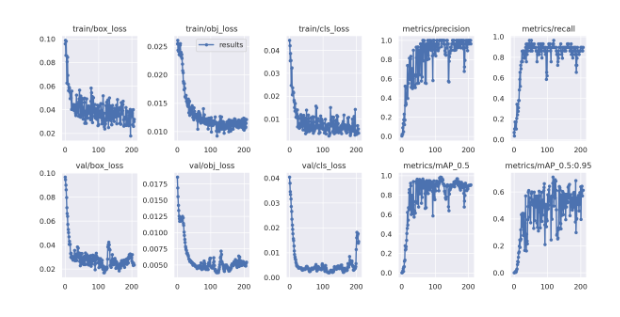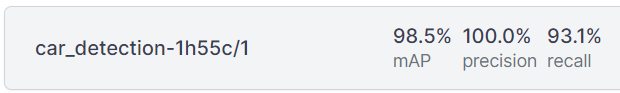

  - *E2* - Testing the models in the dataset. You must implement code routines to test the predictive ability of your models using half of each dataset intended for testing. **The model trained in city A must be tested in city A. The model trained in city B must be tested in city B.** Use the evaluation metrics (accuracy, F1-score, AUC, etc) that are most appropriate for your problem. Plot graphs that illustrate the results obtained for each city (A and B). Plot visual examples of correctly (true positive) and incorrectly (false positive) classified samples. 

[top](#scrollTo=4i5afvUbhmGo)


In [ ]:
# Write your codes for E2 here. Create more code cells if needed
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()




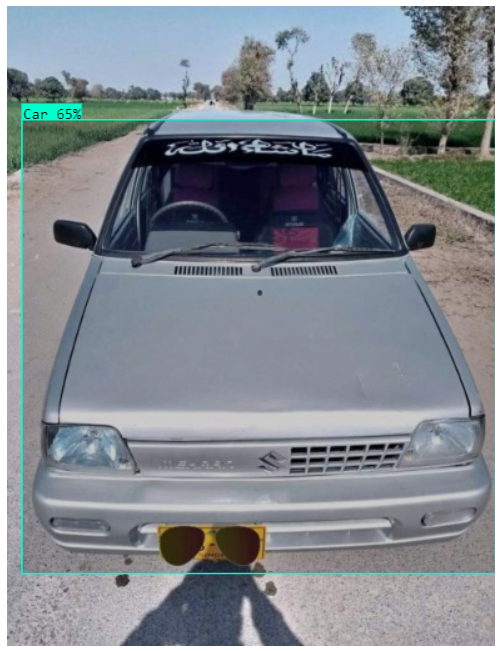

  - *E3* - Testing the models crossing datasets. Here you must do exactly the same as in *E2*, but now training in one city and testing in the other. **The model trained in city A must be tested in city B. The model trained in city B must be tested in city A.** Use the same metrics and plot the same types of graphs so that results are comparable.

[top](scrollTo=4i5afvUbhmGo)

In [ ]:
# Write your codes for E3 here. Create more code cells if needed


#/test has images that we can test our detector on

import random
img_path = "/content/darknet/3rdparty/Binder1_Page_31_Image_0001.png"

#test out our detector!
!./darknet detect cfg/custom-yolov4-detector.cfg backup/custom-yolov4-detector_final.weights {img_path} 
imShow('/content/darknet/predictions.jpg')



---

# 7. **Quiz and Report**

Answer the assessment quiz that will be made available on Canvas one week before the final deadline. Make a 2-page latex report using the [IEEE template](https://www.overleaf.com/read/hkfsjjsxmxcn) with a maximum of 1000 words. You can deliver the report in MS Word if you prefer. Your report should contain five sections: introduction, description of the proposed solution with justifications, results (here you can include the same graphs and pictures generated in this jupyter notebook), discussion of the results, and conclusion. Properly cite references to articles, tutorials, and sources used. A pdf version of your report should be made available in the project's github repository under the name "[project name] + _final_report.pdf".


[top](#scrollTo=4i5afvUbhmGo)


---

# 8. **Demonstration**

Some projects (around 10%) will be selected for a mandatory demonstration. During the demo, you will be asked about implementation details and decisions that led to the design of the developed solution.

[top](#scrollTo=4i5afvUbhmGo)